# MNIST MLP models

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

res = pd.read_csv('results/one.csv', index_col=0, usecols=[0,2,3,4,5,6])
res.head()

,epoch,loss,val_loss,accuracy,val_accuracy
0,1,0.4848,0.2221,0.8552,0.9362
1,2,0.3286,0.1908,0.9028,0.9445
2,3,0.2593,0.1679,0.9238,0.9509
3,4,0.2178,0.1527,0.9365,0.9551
4,5,0.1892,0.1415,0.9450,0.9581


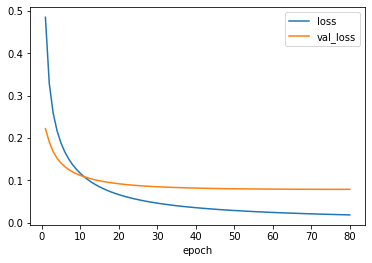

In [2]:
res.plot(x='epoch', y=['loss', 'val_loss'])
plt.show()


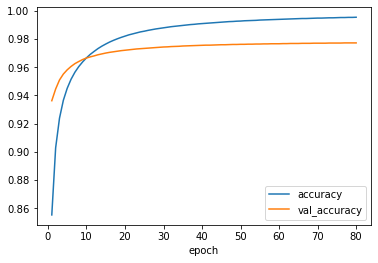

In [3]:
res.plot(x='epoch', y=['accuracy', 'val_accuracy'])
plt.show()

In [4]:
import helpers.mnist_loader as mld
import helpers.evaluation as e
from models.MLP import MLPOne

t_set, v_set, hb_set = mld.loadMNISTDatasets()
_,_, hb_loader = mld.getMNISTLoaders([t_set, v_set, hb_set], batch_size=32)

mlp = e.loadModel(modelClass=MLPOne(),   name="MLPOne")
mlp

/home/william/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


MLPOne(
  (fc1): Linear(in_features=784, out_features=392, bias=True)
  (fc2): Linear(in_features=392, out_features=10, bias=True)
)

In [5]:
from torch.nn.functional import cross_entropy

e.validate(mlp, cross_entropy, hb_loader);


HoldBackSet: Avg. loss: 0.0021, Accuracy: 0.9819 (98.2%)



### Playing with parameters

Using our `TrainingGuider`, we can easily play with the hyperparamters. We added a _ReLu_ activation function to the model too, the `MLPZeroReLu`.

We have explored:

- Training rate: 0.01, 0.05, 0.1
- Batch size: 32, 64

We reduced the number of epochs to 40, since the gain from more was negligeable and we also care for the planet.


In [6]:
#res = pd.read_csv('./results/mlp_zero_params.csv', index_col=0)
#res.head()

In [7]:
subres = res[(res.case == 7) | (res.case == 1)]

AttributeError: 'DataFrame' object has no attribute 'case'

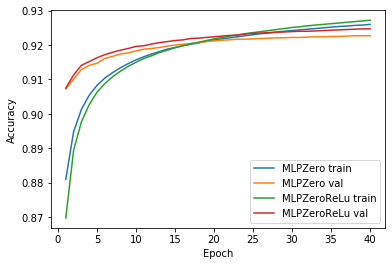

In [19]:
mz = subres[(subres.model == 'MLPZero')]
mzr = subres[(subres.model == 'MLPZeroReLu')]
x =  mz.epoch
# plotting the line 1 points 
plt.plot(x, mz.accuracy, label = "MLPZero train")
plt.plot(x, mz.val_accuracy, label = "MLPZero val")
plt.plot(x, mzr.accuracy, label = "MLPZeroReLu train")
plt.plot(x, mzr.val_accuracy, label = "MLPZeroReLu val")

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show();

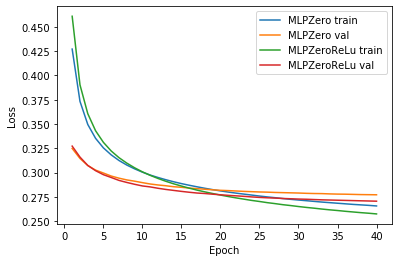

In [21]:
plt.plot(x, mz.loss, label = "MLPZero train")
plt.plot(x, mz.val_loss, label = "MLPZero val")
plt.plot(x, mzr.loss, label = "MLPZeroReLu train")
plt.plot(x, mzr.val_loss, label = "MLPZeroReLu val")

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show();

In [ ]:
subres = res[(res.case == 1) | (res.case == 2)]

## MLPOne

Trained with:

- Learning rate: 0.01, 0.04, 0.07
- Batch size: 64, 128

In [8]:
res = pd.read_csv('results/one_params.csv', index_col=0, usecols=[0,2,3,4,5,6,7,8])
res[res.epoch == 80].sort_values(by=['val_accuracy'], ascending=False)

,epoch,loss,val_loss,accuracy,val_accuracy,learning_rate,batch_size
399,80,0.0135,0.0734,0.9967,0.9800,0.07,64
479,80,0.0281,0.0843,0.9927,0.9767,0.07,128
159,80,0.0367,0.0845,0.9914,0.9750,0.04,128
79,80,0.2552,0.3092,0.9887,0.9730,0.04,64
319,80,0.1092,0.1312,0.9710,0.9624,0.01,128
239,80,0.1459,0.1779,0.9523,0.9408,0.01,64


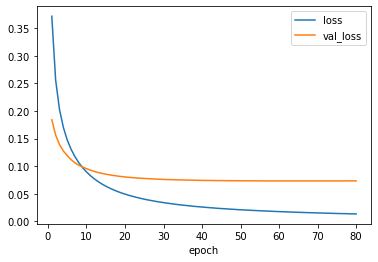

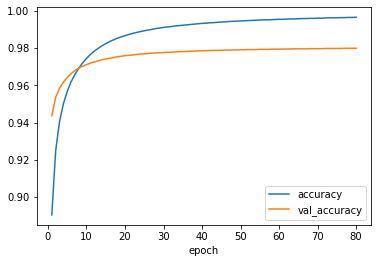

In [9]:
best_one = res[(res.learning_rate == 0.07) & (res.batch_size == 64)]
best_one.plot(x='epoch', y=['loss', 'val_loss'])
best_one.plot(x='epoch', y=['accuracy', 'val_accuracy'])

In [10]:
one1 = e.loadModel(modelClass=MLPOne(),   name="model_MLPOne_learning_rate_0.01_batch_size_64_optimizer_sgd")
one2 = e.loadModel(modelClass=MLPOne(),   name="model_MLPOne_learning_rate_0.04_batch_size_64_optimizer_sgd")
one3 = e.loadModel(modelClass=MLPOne(),   name="model_MLPOne_learning_rate_0.07_batch_size_64_optimizer_sgd")
one4 = e.loadModel(modelClass=MLPOne(),   name="model_MLPOne_learning_rate_0.01_batch_size_128_optimizer_sgd")
one5 = e.loadModel(modelClass=MLPOne(),   name="model_MLPOne_learning_rate_0.04_batch_size_128_optimizer_sgd")
one6 = e.loadModel(modelClass=MLPOne(),   name="model_MLPOne_learning_rate_0.07_batch_size_128_optimizer_sgd")

e.validate(one1, cross_entropy, hb_loader);
e.validate(one2, cross_entropy, hb_loader);
e.validate(one3, cross_entropy, hb_loader);
e.validate(one4, cross_entropy, hb_loader);
e.validate(one5, cross_entropy, hb_loader);
e.validate(one6, cross_entropy, hb_loader);



HoldBackSet: Avg. loss: 0.0021, Accuracy: 0.9801 (98.0%)


HoldBackSet: Avg. loss: 0.0092, Accuracy: 0.9779 (97.8%)


HoldBackSet: Avg. loss: 0.0023, Accuracy: 0.9819 (98.2%)


HoldBackSet: Avg. loss: 0.0024, Accuracy: 0.9763 (97.6%)


HoldBackSet: Avg. loss: 0.0021, Accuracy: 0.9802 (98.0%)


HoldBackSet: Avg. loss: 0.0022, Accuracy: 0.98 (98.0%)



## MLPTwo

![MLPTwo](./report/mlp_two/architectureTwo.png)

In [1]:
res = pd.read_csv('results/two.csv', index_col=0, usecols=[0,2,3,4,5,6])
res.head()

NameError: name 'pd' is not defined